<a href="https://www.kaggle.com/code/barramalikwibowo/rice-leaf-diseases-detection?scriptVersionId=152696513" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Rice Leaf Diseases Detection

Rice Leaf Diseases Detection ini merupakan salah satu fitur dari project yang sedang kami buat dalam rangka menyelesaikan tugas capstone project

## Input

### Library

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, callbacks
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

### Dataset

In [2]:
train_data = '/kaggle/input/riceleafs/RiceLeafs/train'
valid_data = '/kaggle/input/riceleafs/RiceLeafs/validation'

In [3]:
classes=[]
for file in os.listdir(train_data):
    classes+=[file]
print(classes)
print(len(classes))

['Hispa', 'Healthy', 'BrownSpot', 'LeafBlast']
4


In [4]:
brownspot = [train_data + '/BrownSpot/' + img for img in os.listdir(train_data + '/BrownSpot')[:9]]
healthy = [train_data  + '/Healthy/' + img for img in os.listdir(train_data + '/Healthy')[:9]]
hispa = [train_data  + '/Hispa/' + img for img in os.listdir(train_data + '/Hispa')[:9]]
leafblast = [train_data  + '/LeafBlast/' + img for img in os.listdir(train_data + '/LeafBlast')[:9]]

#### Brown Spot

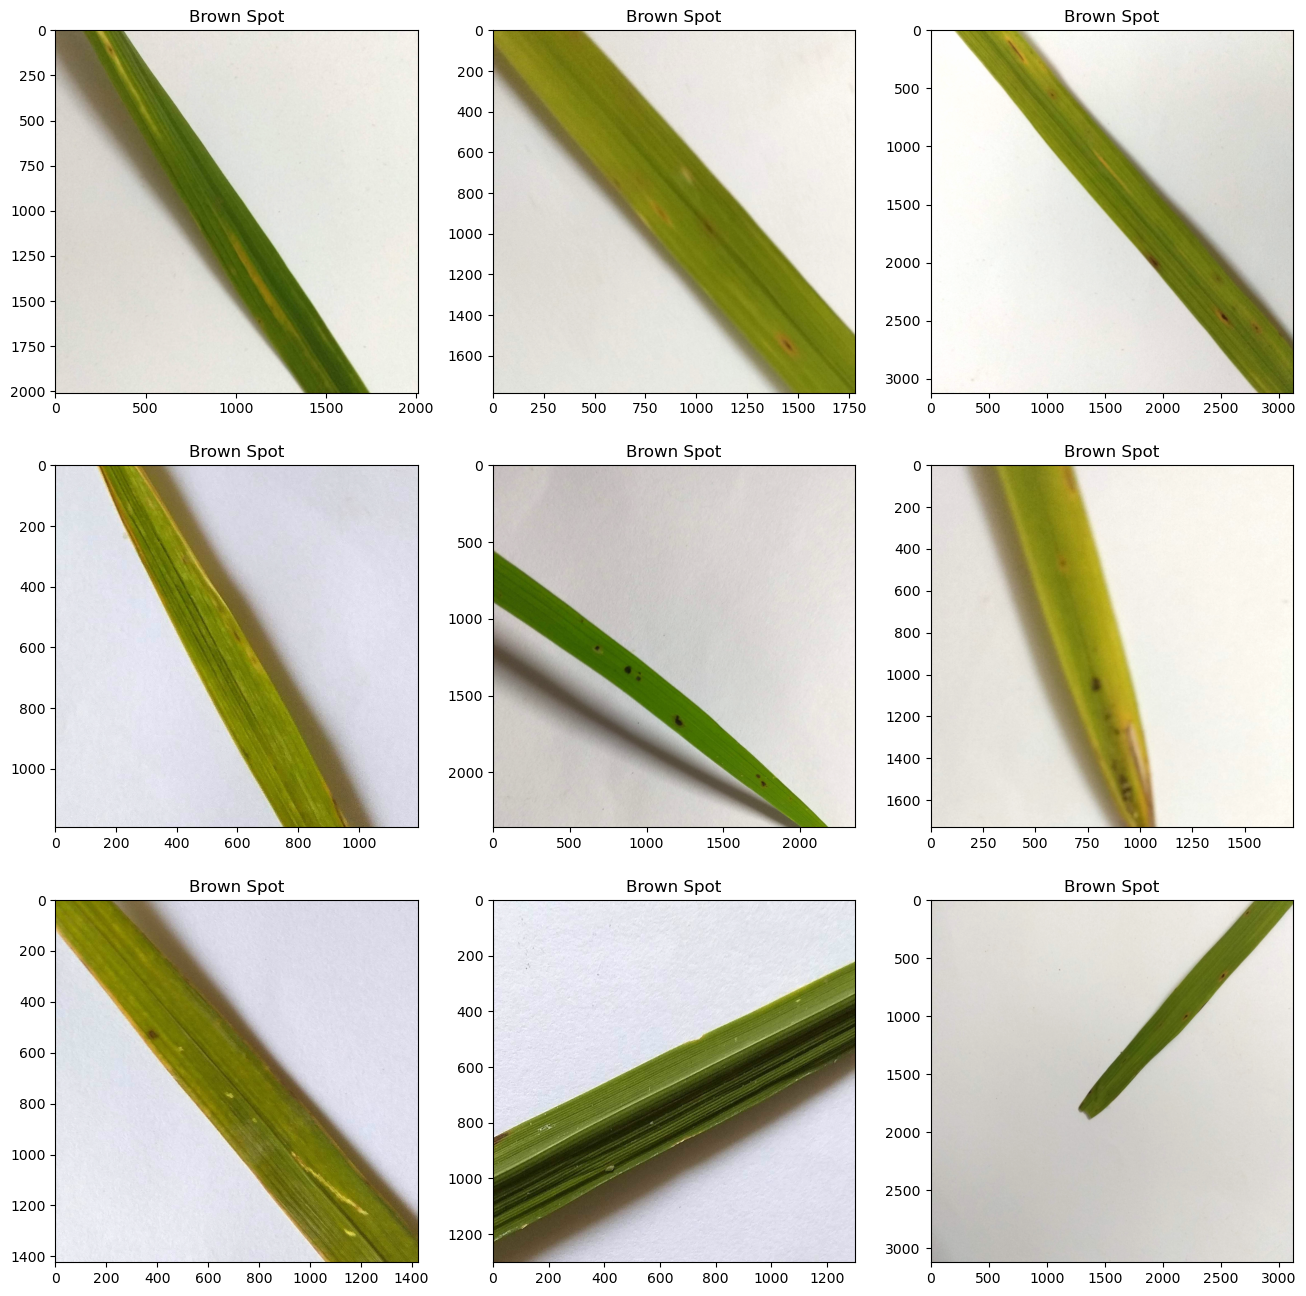

In [5]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(brownspot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")

#### Hispa Leaf

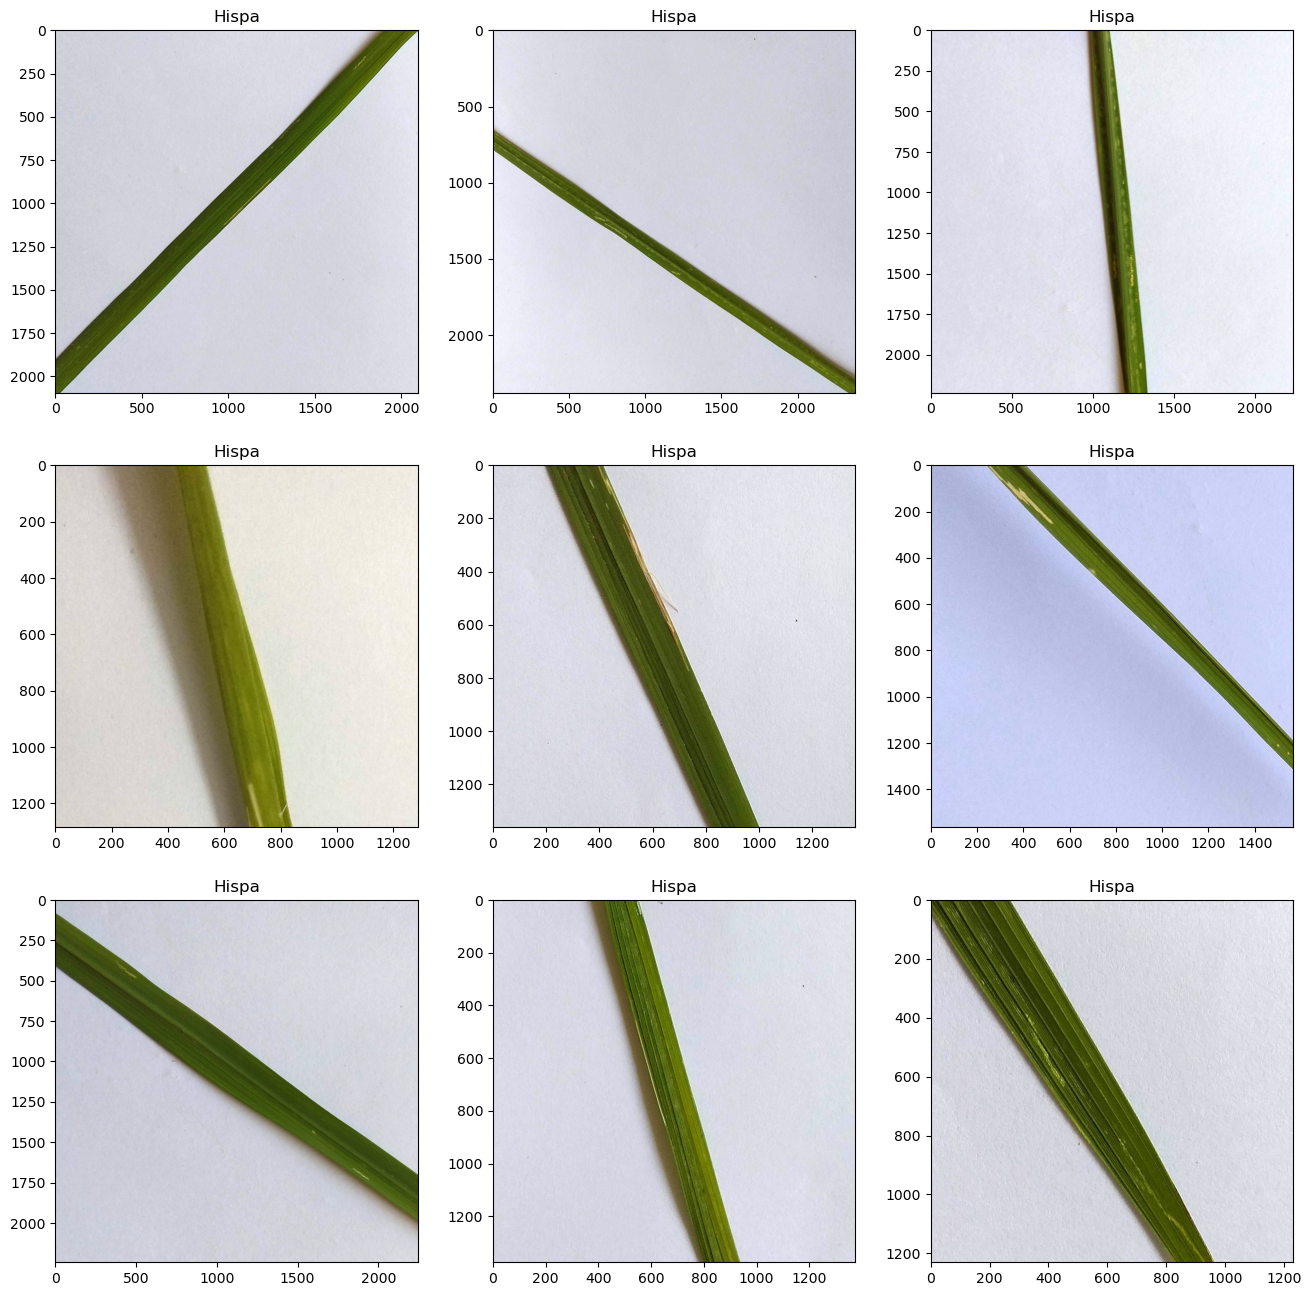

In [6]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(hispa):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Hispa")

#### Leaf Blast

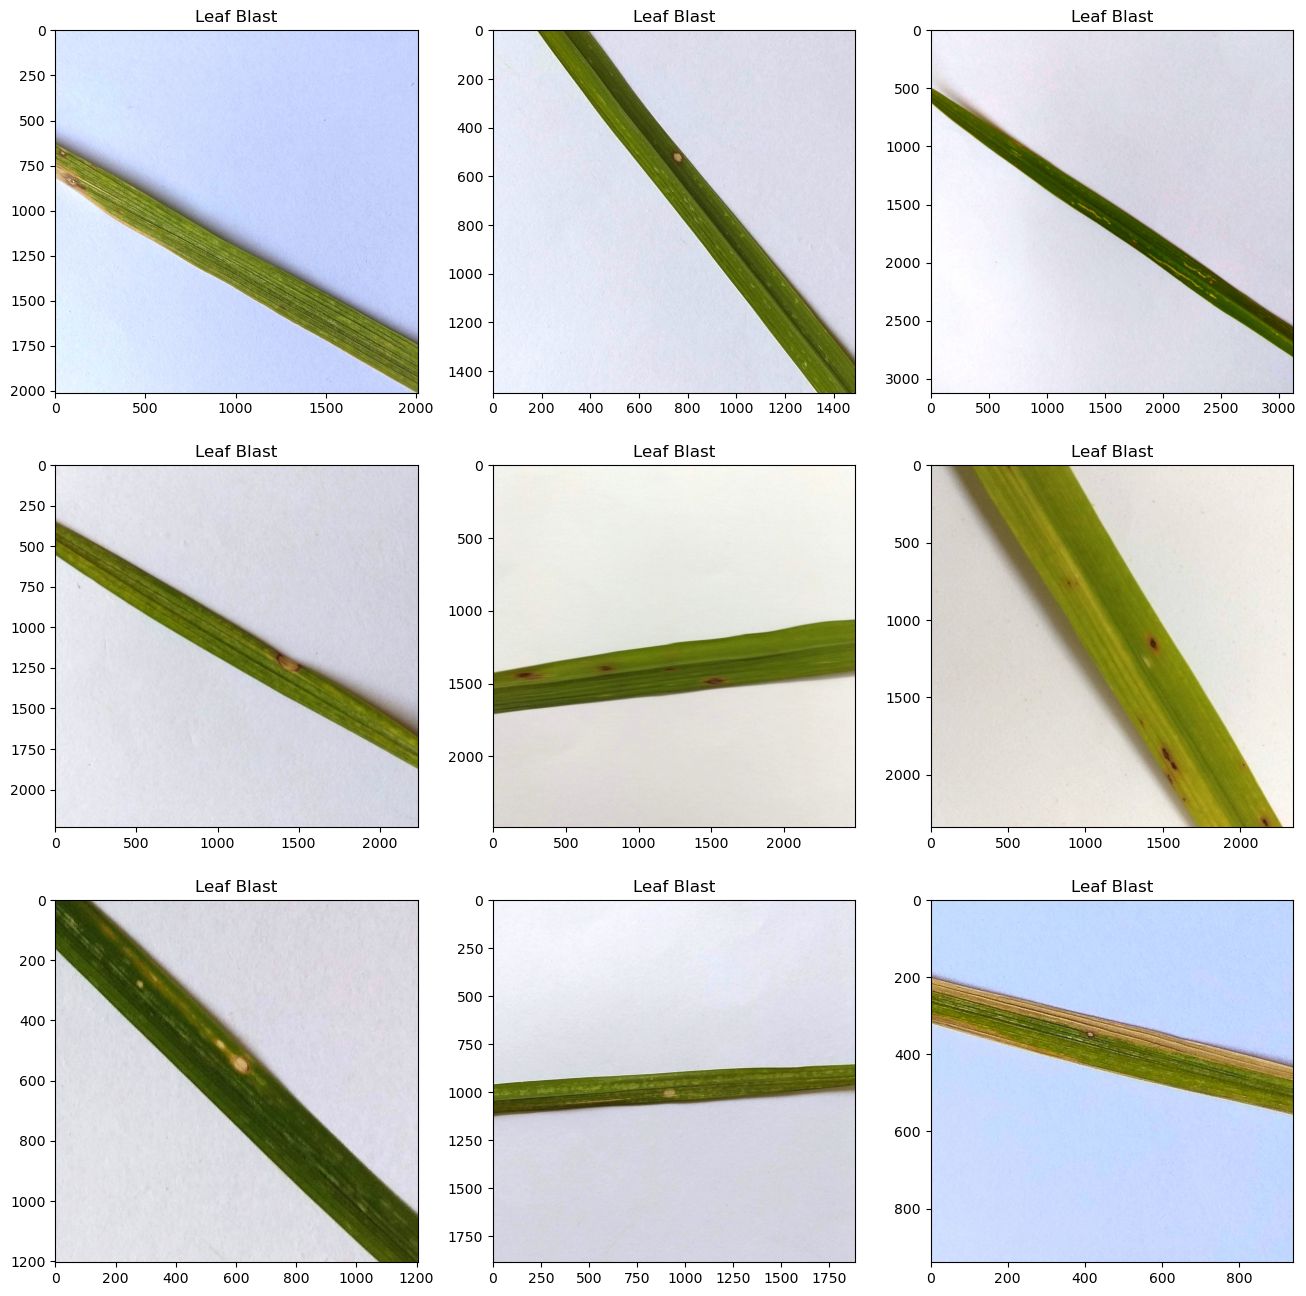

In [7]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(leafblast):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Blast")

#### Healthy

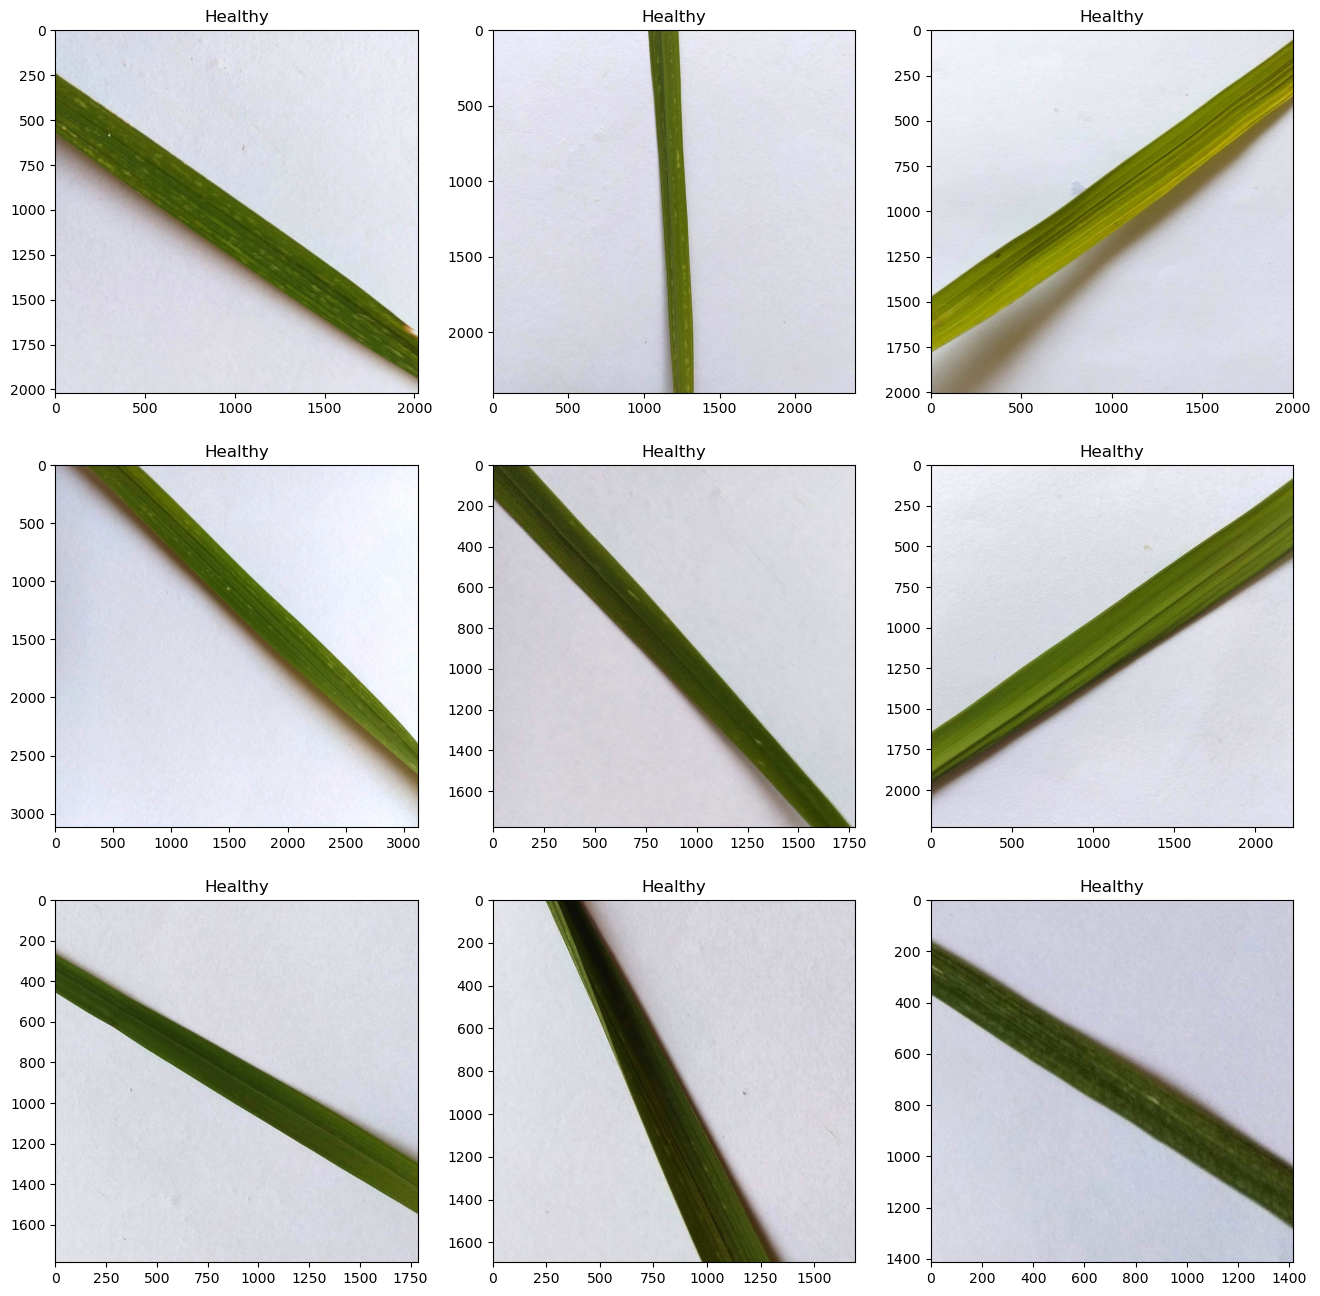

In [8]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(healthy):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Healthy")

In [9]:
dataGenerator = ImageDataGenerator(rescale= 1. / 255)
train_data = dataGenerator.flow_from_directory(
    train_data,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
)
val_data = dataGenerator.flow_from_directory(
    valid_data,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
)

Found 2684 images belonging to 4 classes.
Found 671 images belonging to 4 classes.


## Model

In [10]:
base_model = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)
base_model.trainable = False

94668760/94668760 [==============================] - 1s 0us/step


In [11]:
model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 49,256,196
Trainable params: 25,691,396
Non-trainable params: 23,564,800
_________________________________________________________________


In [12]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
history = model.fit(train_data,validation_data=val_data,epochs=20)

Epoch 1/20
42/42 [==============================] - 348s 8s/step - loss: 7.9252 - accuracy: 0.4463 - val_loss: 1.4881 - val_accuracy: 0.3577
Epoch 2/20
42/42 [==============================] - 191s 5s/step - loss: 0.8068 - accuracy: 0.6643 - val_loss: 1.8445 - val_accuracy: 0.3055
Epoch 3/20
42/42 [==============================] - 184s 4s/step - loss: 0.5868 - accuracy: 0.7701 - val_loss: 1.8103 - val_accuracy: 0.3368
Epoch 4/20
42/42 [==============================] - 186s 4s/step - loss: 0.4214 - accuracy: 0.8409 - val_loss: 2.0731 - val_accuracy: 0.3502
Epoch 5/20
42/42 [==============================] - 187s 4s/step - loss: 0.3059 - accuracy: 0.8938 - val_loss: 2.5590 - val_accuracy: 0.2906
Epoch 6/20
42/42 [==============================] - 185s 4s/step - loss: 0.2170 - accuracy: 0.9374 - val_loss: 2.6481 - val_accuracy: 0.3323
Epoch 7/20
42/42 [==============================] - 189s 5s/step - loss: 0.1522 - accuracy: 0.9583 - val_loss: 2.8036 - val_accuracy: 0.3353
Epoch 8/20
42

## Save Model

In [14]:
model.save('./model.h5')
model.save('./model')
model.save('./model.tflite')

## Evaluate

### Loss & Accuracy

In [15]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()
    ax = plt.subplot(1, 2, 2) 
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

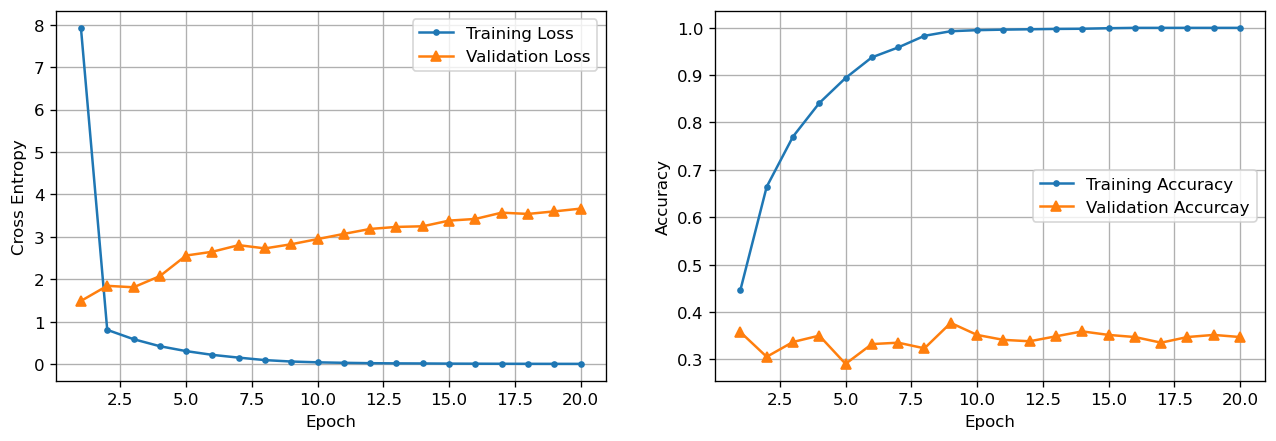

In [16]:
plot_training_curves(pd.DataFrame(history.history))